In [1]:
%matplotlib notebook

from gamesopt.train_distributed import train, TrainDistributedConfig
from gamesopt.games import load_game, GameOptions
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
from gamesopt.optimizer.quantization import QuantizationOptions, QuantizationType
import torch
from collections import defaultdict
import matplotlib.pyplot as plt

TrainDistributedConfig(game=GameOptions(game_type=<GameType.QUADRATIC: 'quadratic'>, quadratic_options=QuadraticGameConfig(num_samples=10, dim=2, num_players=2, bias=True, mu=0.0, ell=None, importance_sampling=False, matrix=None), kelly_auction_options=KellyAuctionConfig(bidding_cost=100, ressources=1000, marginal_utility_gains=(1.8, 2.0, 2.2, 2.4)), robust_linear_reg_options=RobustLinRegConfig(num_samples=10, dim=2, lambda_coeff=0.2, gamma_coeff=0.2), bilinear_options=BilinearGameConfig(num_samples=10, dim=2, bias=True)), optimizer=OptimizerOptions(optimizer_type=<OptimizerType.VR_DIANA_SGDA: 'VR-DIANA-SGDA'>, lr=0.1, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.RANDK: 'RandK'>, k=5)), prox=ProxOptions(prox_type=<ProxType.NONE: 'none'>, l1_reg=0.01, ball_radius=1.0), num_iter=200, seed=1234, name='', save_file=None, load_file=None, precision=1.0, n_process=2)


<IPython.core.display.Javascript object>


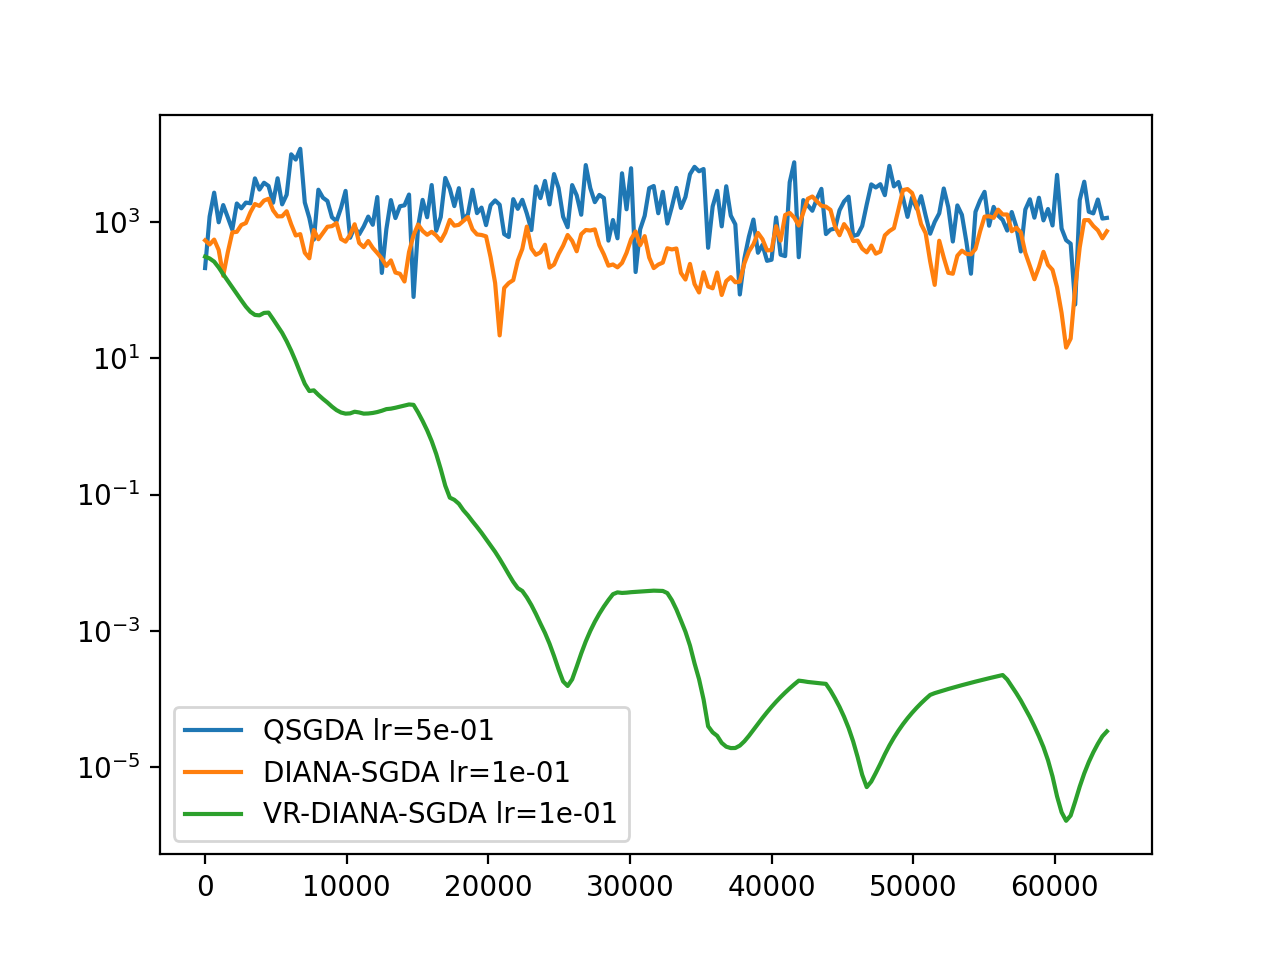

In [7]:
config = TrainDistributedConfig()
config.game.quadratic_options.num_samples = 10
config.game.quadratic_options.dim = 2
config.num_iter = 200
config.game.quadratic_options.bias = True
config.optimizer.quantization_options =  QuantizationOptions(quantization_type=QuantizationType.RANDK)
print(config)

plt.figure()
plt.yscale('log')

In [8]:
config.optimizer.lr = 5e-1
config.optimizer.optimizer_type = OptimizerType.QSGDA
record = train(config)
record.load_metrics()
plt.plot(record.metrics.n_bits, record.metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

Trying port 26597
Init...
Starting...
c0109af4-58cb-4998-9574-15620a4a0f46
Init...
Starting...
c0109af4-58cb-4998-9574-15620a4a0f46


In [9]:
config.optimizer.lr = 1e-1
config.optimizer.optimizer_type = OptimizerType.DIANA_SGDA
record = train(config)
record.load_metrics()
plt.plot(record.metrics.n_bits, record.metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

Trying port 25711
Init...
Starting...
c0109af4-58cb-4998-9574-15620a4a0f46
Init...
Starting...
c0109af4-58cb-4998-9574-15620a4a0f46


In [10]:
config.optimizer.lr = 1e-1
config.optimizer.optimizer_type = OptimizerType.VR_DIANA_SGDA
record = train(config)
record.load_metrics()
plt.plot(record.metrics.n_bits, record.metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

Trying port 17498
Init...
Starting...
c0109af4-58cb-4998-9574-15620a4a0f46
Init...
Starting...
c0109af4-58cb-4998-9574-15620a4a0f46


In [11]:
plt.legend()
plt.show()